# Practica 7 AA1

Realizada por David Cruz Sánchez

Comenzamos importando todo lo necesario.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import time
from vecinos import CentroideMasProximo
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Importamos los datos y los dividimos en train y test:

In [3]:
df = pd.read_csv("precio_casas_clasificacion.csv", sep=";")

y = df.iloc[: , -1]
X = df.iloc[: , :-1]
trainx,testx, trainy, testy = train_test_split(X,y, train_size=0.7)
df.head()

,Mediana ingresos,Mediana antiguedad,Num. hab. promedio,Num. dorm. promedio,Poblacion,Ocup. promedio,Latitud,Longitud,Mediana precio,Precio
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,muy alto
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,alto
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,alto
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,alto
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,alto


### Tasa de acierto vecinos 1-20

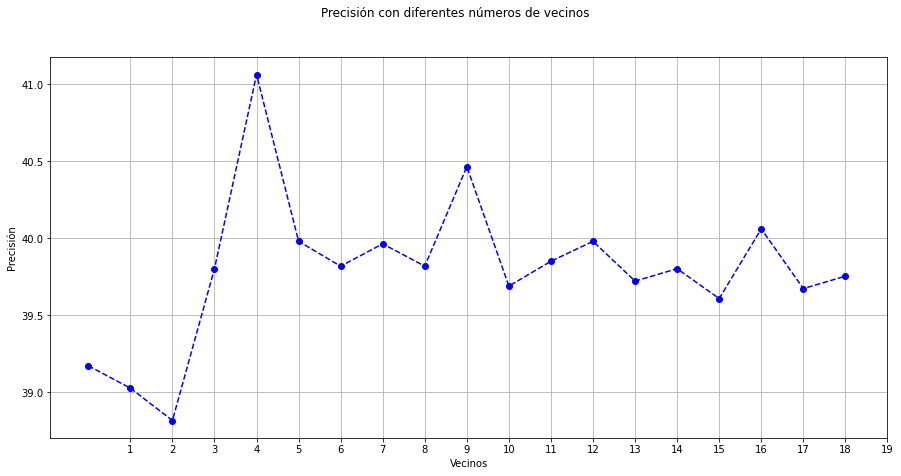

In [4]:
dic = {}
for n_neighbors in range(1, 20):
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors)
    neigh.fit(trainx,trainy)
    accuracy = accuracy_score(testy,neigh.predict(testx))
    dic[n_neighbors] = accuracy*100

fig, ax = plt.subplots(nrows=1,ncols=2)
fig.set_figheight(7)
fig.set_figwidth(15)
fig.suptitle('Precisión con diferentes números de vecinos')
ax = plt.subplot(111)
ax.plot(np.arange(len(dic.keys())) , dic.values(),"--bo", color='blue')
ax.set_xlabel('Vecinos')
ax.set_ylabel('Precisión')
ax.set_xticks( list(dic.keys()))
ax.grid()
plt.show()

Como podemos ver la precisión es considerablemente baja. Para tratar de mejorarla repetiremos el proceso con los datos escalados.

### 1-20 vecinos escalado de 0 a 1

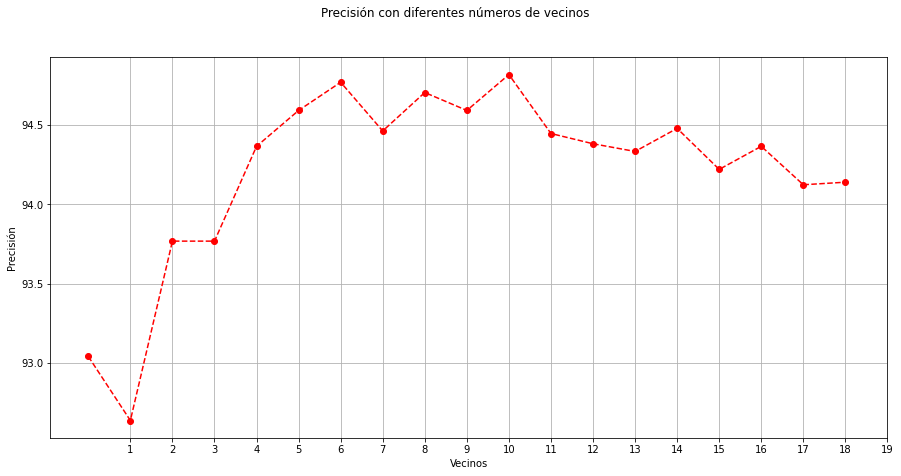

In [5]:
scaler = MinMaxScaler(feature_range=[0,1]).fit(trainx)
trainx_new = scaler.transform(trainx)
testx_new = scaler.transform(testx)

dic = {}
for n_neighbors in range(1, 20):
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors)
    neigh.fit(trainx_new,trainy)
    accuracy = accuracy_score(testy,neigh.predict(testx_new))
    dic[n_neighbors] = accuracy*100

fig, ax = plt.subplots(nrows=1,ncols=2)
fig.set_figheight(7)
fig.set_figwidth(15)
fig.suptitle('Precisión con diferentes números de vecinos')
ax = plt.subplot(111)
ax.plot(np.arange(len(dic.keys())) , dic.values(),"--bo", color='red')
ax.set_xlabel('Vecinos')
ax.set_ylabel('Precisión')
ax.set_xticks(list(dic.keys()))
ax.grid()
plt.show()

<p style='text-align: justify;'>Con los valores escalados da mucho mejores resultados, con un 94% en los picos. Con estos dos análisis, podemos ver que es necesario un número concreto de vecinos para llegar a la mejor precisión, pero más vecinos, no implican mayor precisión. Los vecinos indican cuántas muestras se están teniendo en cuenta de los alrededores de una en concreto, para clasificar esa muestra.</p>

### Precisión según vecinos, con diferentes métodos, escalados.

In [6]:
scaler = MinMaxScaler(feature_range=[0,1]).fit(trainx)
trainx_new = scaler.transform(trainx)
testx_new = scaler.transform(testx)
dic = {}
dic2 = {}
dic3 = {}
inicio = time.time()

for n_neighbors in range(1, 20):
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors,algorithm="ball_tree")
    neigh.fit(trainx_new,trainy)
    accuracy = accuracy_score(testy,neigh.predict(testx_new))
    dic[n_neighbors] = accuracy*100

fin = time.time()
print("Tiempo transcurrido para ball_tree: {:.3f} seg.".format(fin - inicio))




inicio = time.time()
for n_neighbors in range(1, 20):
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors, algorithm="kd_tree")
    neigh.fit(trainx_new,trainy)
    accuracy = accuracy_score(testy,neigh.predict(testx_new))
    dic2[n_neighbors] = accuracy*100
fin = time.time()
print("Tiempo transcurrido para kd_tree: {:.3f} seg.".format(fin - inicio))




inicio = time.time()
for n_neighbors in range(1, 20):
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors, algorithm="brute")
    neigh.fit(trainx_new,trainy)
    accuracy = accuracy_score(testy,neigh.predict(testx_new))
    dic3[n_neighbors] = accuracy*100

fin = time.time()
print("Tiempo transcurrido para brute: {:.3f} seg.".format(fin - inicio))




Tiempo transcurrido para ball_tree: 13.948 seg.
Tiempo transcurrido para kd_tree: 9.216 seg.
Tiempo transcurrido para brute: 56.675 seg.


Repetimos la prueba con los 3 algoritmos de búsqueda que implementa la clase, y comprobamos que el algoritmo más rápido en realizar el análisis de 20 vecinos con datos escalados es "kd_tree", y el más lento "brute".

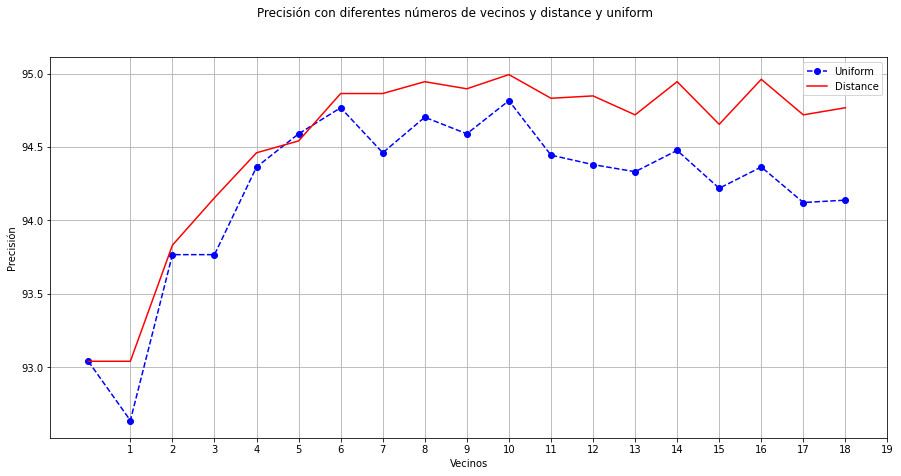

In [7]:
dic_uniform = {}
dic_distance = {}
for n_neighbors in range(1, 20):
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors, weights="distance")
    neigh.fit(trainx_new,trainy)
    accuracy = accuracy_score(testy,neigh.predict(testx_new))
    dic_distance[n_neighbors] = accuracy*100
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors, weights="uniform")
    neigh.fit(trainx_new,trainy)
    accuracy = accuracy_score(testy,neigh.predict(testx_new))
    dic_uniform[n_neighbors] = accuracy*100

fig, ax = plt.subplots(nrows=1,ncols=2)
fig.set_figheight(7)
fig.set_figwidth(15)
fig.suptitle('Precisión con diferentes números de vecinos y distance y uniform')
ax = plt.subplot(111)
ax.plot(np.arange(len(dic_uniform.keys())) , dic_uniform.values(),"--bo", color='blue')
ax.plot(np.arange(len(dic_distance.keys())), dic_distance.values(),  color='red')
ax.set_xlabel('Vecinos')
ax.set_ylabel('Precisión')
ax.set_xticks(list(dic_distance.keys()))
ax.legend(['Uniform','Distance'])
ax.grid()
plt.show()

Da mejor precisión el método por distancia, ya que tiene en cuenta no sólo el número de vecinos cercanos sino también la distancia a la que esté cada uno.

In [8]:
print("El mejor número de vecinos para distance es: " + str(max(zip(dic_distance.values(), dic_distance.keys()))[1]) + " con un accuracy de: " +  str(max(zip(dic_distance.values(), dic_distance.keys()))[0]))

El mejor número de vecinos para distance es: 11 con un accuracy de: 94.99434845793638


### Implementación propia del centroide más próximo comparada con la implementación de sklearn

In [9]:
impl = CentroideMasProximo()
impl.fit(trainx,trainy)
print("Precision sin escalar implementada: " + str(sum(np.equal(impl.predict(testx), testy.values))/len(testy.values)))

sk_Cen = NearestCentroid()
sk_Cen.fit(trainx,trainy)
print("Precision sin escalar de sklearn: " + str(sum(np.equal(sk_Cen.predict(testx), testy.values))/len(testy.values)))

Precision sin escalar implementada: 0.2331664782819312
Precision sin escalar de sklearn: 0.2331664782819312


La precisión de ambos modelos es idéntica, sobre un 20% sin escalar. Aunque sea una precisión alarmantemente baja, podemos mejorarla escalando los datos.

In [10]:
impl_esc = CentroideMasProximo()
impl_esc.fit(trainx_new, trainy)
print("Precision con datos escalados implementada: " + str(sum(np.equal(impl_esc.predict(testx_new), testy.values))/len(testy.values)))

sk_Cen_esc = NearestCentroid()
sk_Cen_esc.fit(trainx_new,trainy)
print("Precision con datos escalados de sklearn: " + str(sum(np.equal(sk_Cen_esc.predict(testx_new), testy.values))/len(testy.values)))

Precision con datos escalados implementada: 0.7211367673179396
Precision con datos escalados de sklearn: 0.7211367673179396


Como podemos comprobar, con los datos escalados vuelven a dar la misma precisión pero ahora con un 70% aproximadamente de precisión que es bastante más decente.

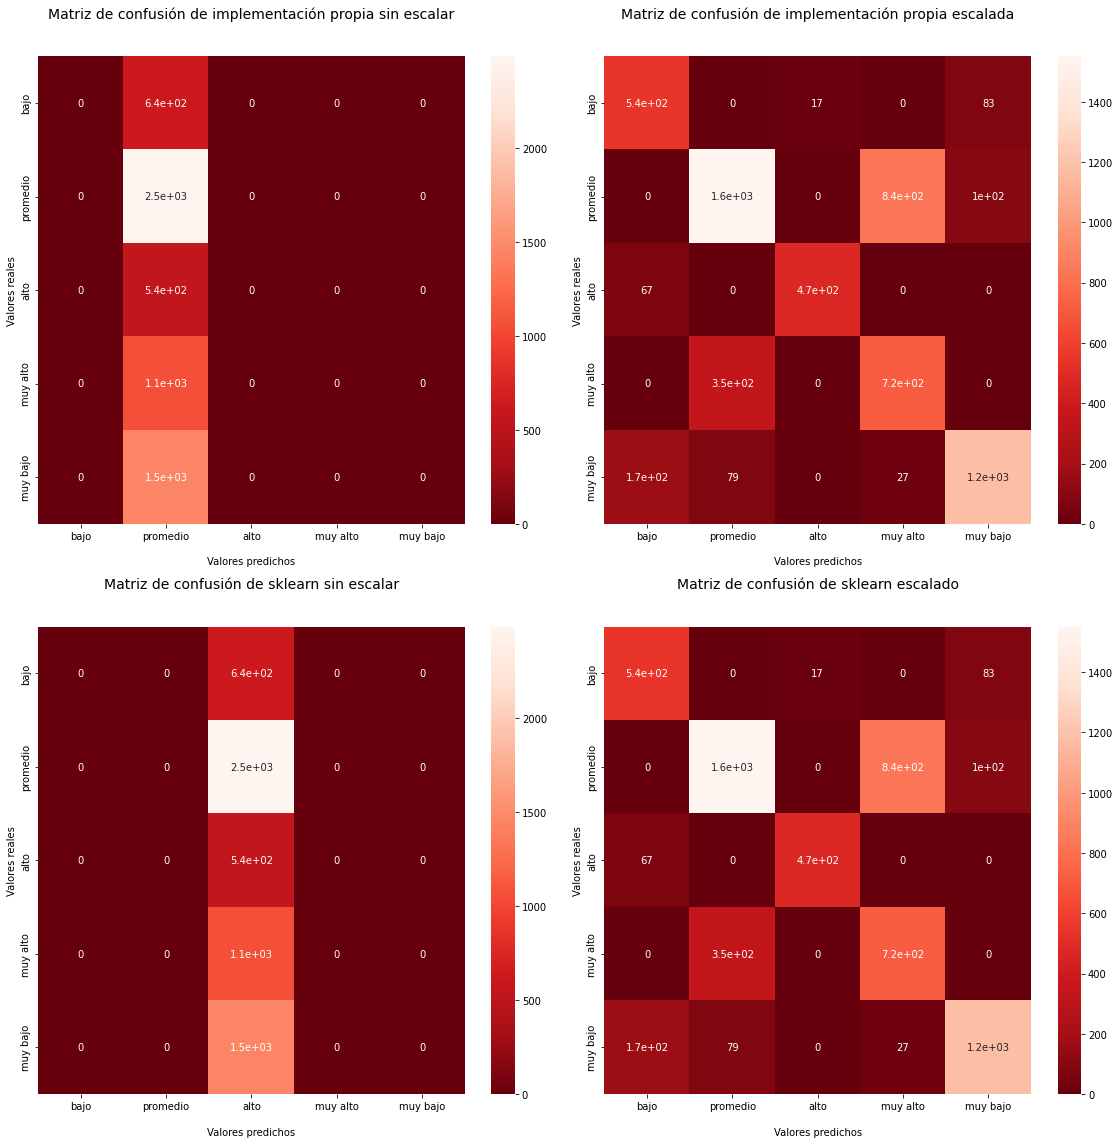

In [11]:
fig, ax = plt.subplots(nrows=2,ncols=2)
fig.set_figheight(16)
fig.set_figwidth(16)
model = {"implementación propia sin escalar" : impl,
         "implementación propia escalada": impl_esc,
         "sklearn sin escalar": sk_Cen,
         "sklearn escalado": sk_Cen_esc}
for i in range(4):
    matrix = confusion_matrix(testy.values, list(model.values())[i].predict(testx_new))
    ax = plt.subplot(2, 2, i+1)
    ax = sns.heatmap(matrix, annot=True, cmap='Reds_r')
    ax.set_title('Matriz de confusión de ' +  str(list(model.keys())[i]) + '\n\n', fontsize=14);
    ax.set_xlabel('\nValores predichos')
    ax.set_ylabel('Valores reales');
    ax.xaxis.set_ticklabels(trainy.unique())
    ax.yaxis.set_ticklabels(trainy.unique())

plt.tight_layout()
plt.show()

<p style='text-align: justify;'>  Como podemos ver, al no tener los datos escalados, ambas versiones predicen todos los conjuntos de casas a la misma clase, esto se deberá a que alguna variable debe estar afectando en gran medida al resto, como podría ser población que es relativamente más alta que el resto. Esto se traduce en baja precisión por el algoritmo, tanto el implementado como el de la librería sklearn. Por otro lado, con los datos escalados, la versión de sklearn ya da resultados mucho mejores con una precisión del 70% aproximadamente, por la matriz de confusión observamos que su mayor error fue predecir como promedio a algunos grupos de casa que pertenecían a precios muy bajos. La implementación verificamos que es correcta pues da exactamente los mismos valores que la función de sklearn, por ello tiene los mismos errores.</p>
